In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [305]:
df = pd.read_csv("C:/Users/karna/Downloads/international-airline-passengers.csv",usecols=[1])
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [306]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


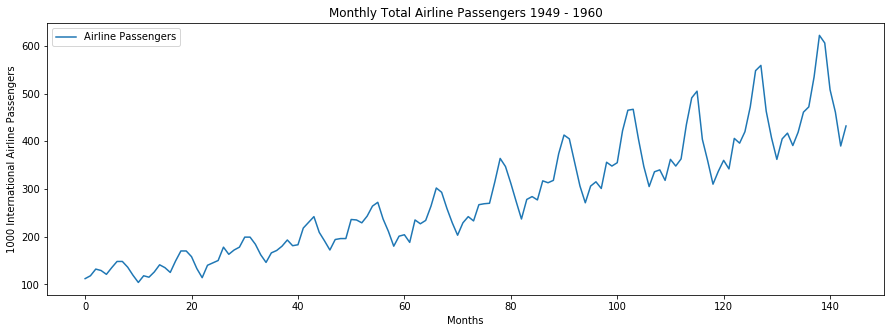

In [307]:
plt.figure(figsize = (15, 5))
plt.plot(df, label = "Airline Passengers")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.legend()
plt.show()

In [308]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.stattools import acf,pacf

In [309]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [310]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

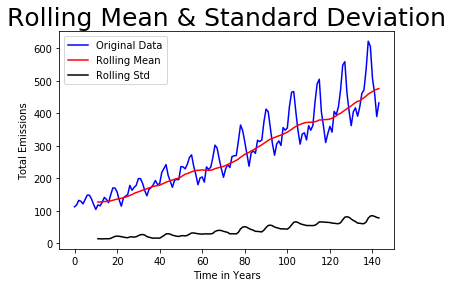

In [311]:
TestStationaryPlot(df)

In [312]:
df = df.dropna()

In [313]:
TestStationaryAdfuller(df.iloc[:,0])

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


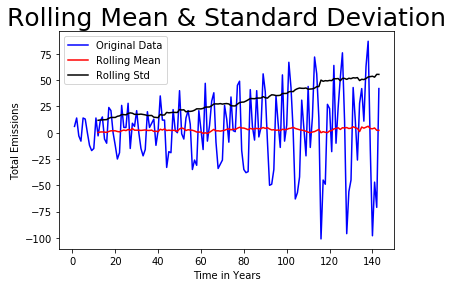

In [314]:
df_first_difference = df - df.shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))

C:\Users\karna\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


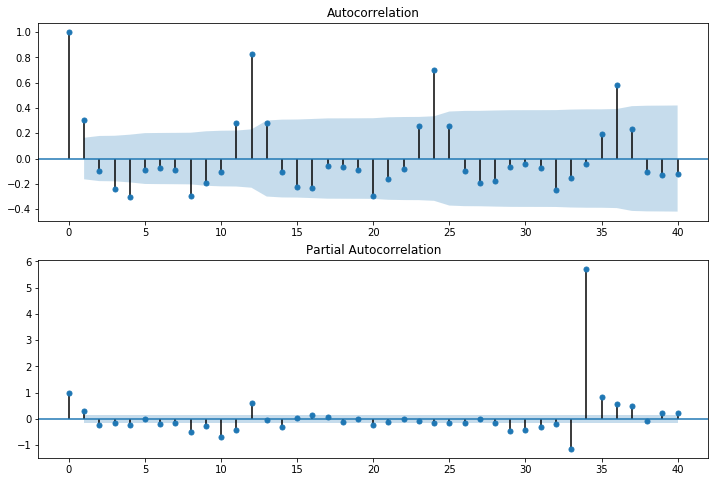

In [315]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_first_difference.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_first_difference.dropna(), lags=40, ax=ax2)


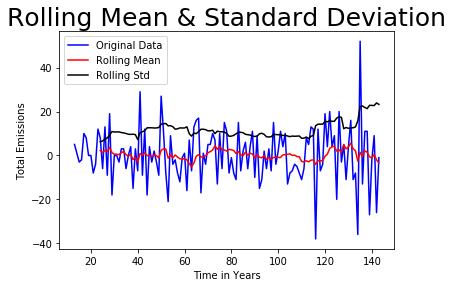

In [316]:
diff12 = df_first_difference - df_first_difference.shift(12)  
TestStationaryPlot(diff12.dropna(inplace=False))

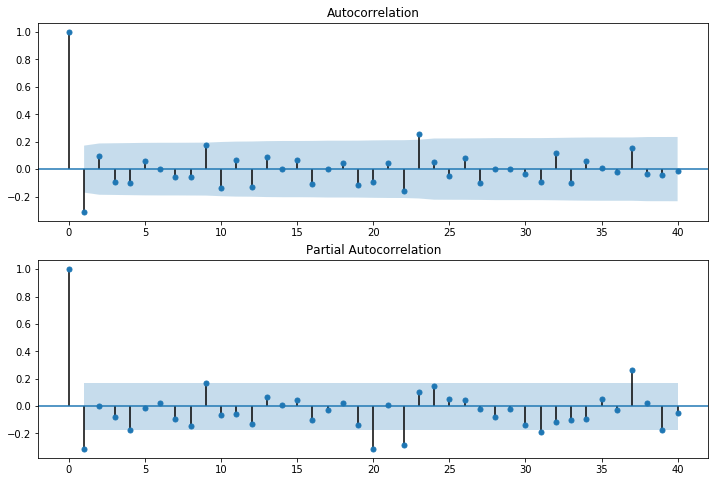

In [317]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff12.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff12.dropna(), lags=40, ax=ax2)

In [318]:
TestStationaryAdfuller(diff12.iloc[:,0].dropna())

Test Statistic                -1.559562e+01
p-value                        1.856512e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [326]:
ts = pd.read_csv("C:/Users/karna/Downloads/international-airline-passengers.csv")
ts.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [327]:
ts = ts.dropna()

In [328]:
ts.reset_index(inplace=True)
ts['Month'] = pd.to_datetime(ts['Month'])
ts = ts.set_index('Month')


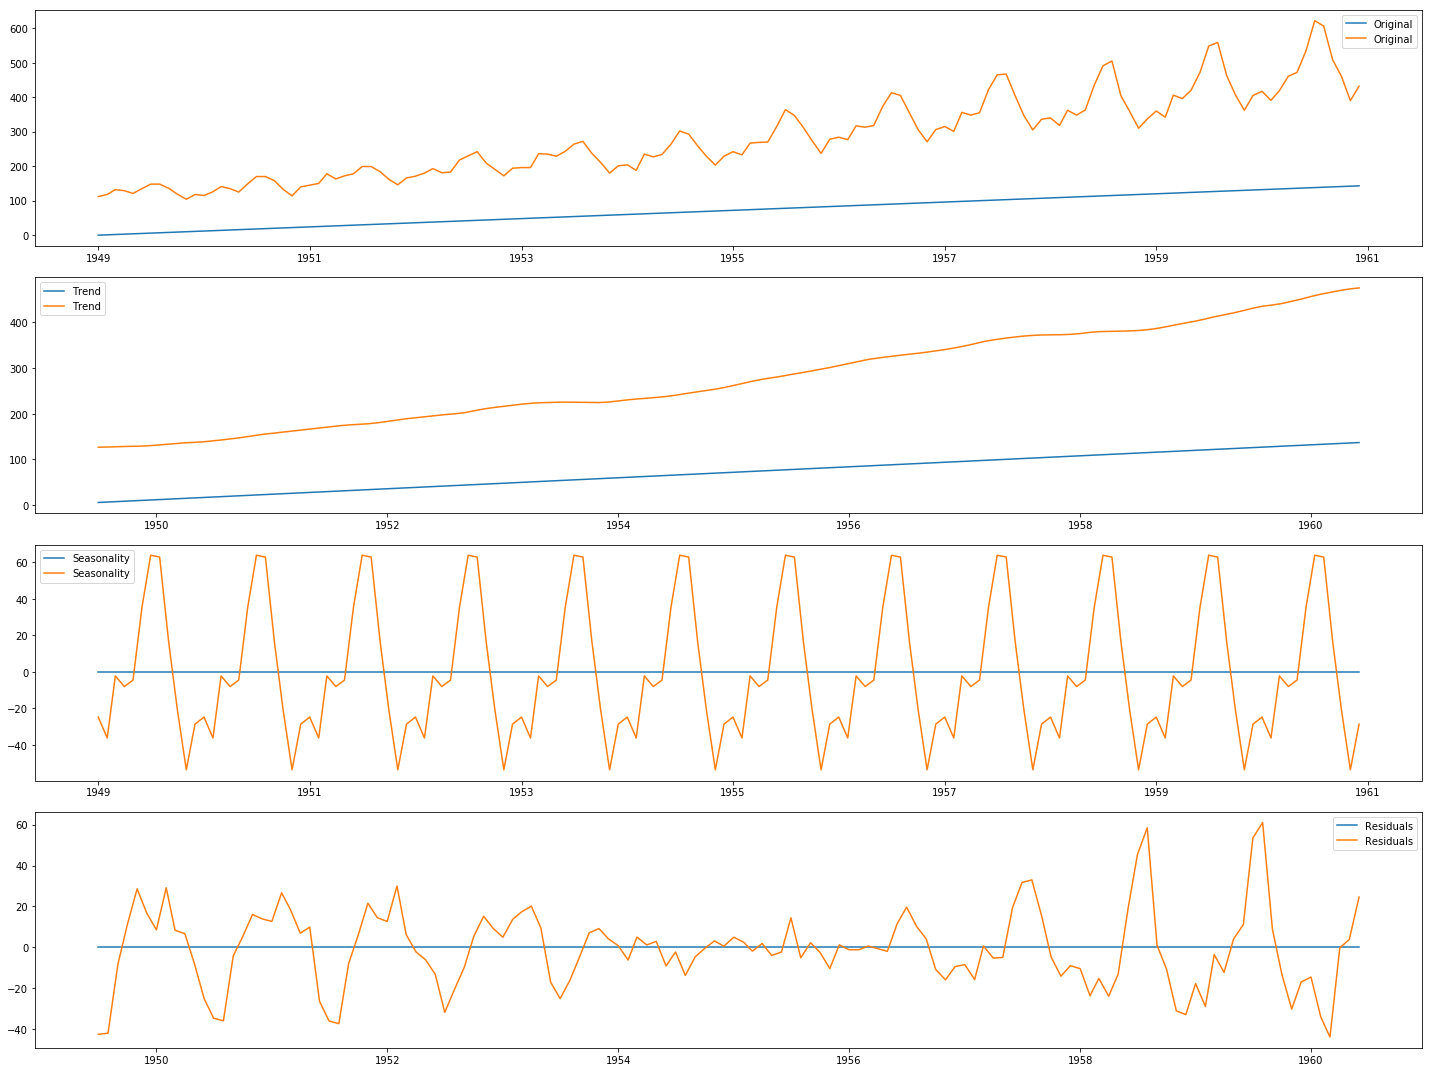

In [329]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig,ax = plt.subplots()
fig.set_size_inches(20,15)
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


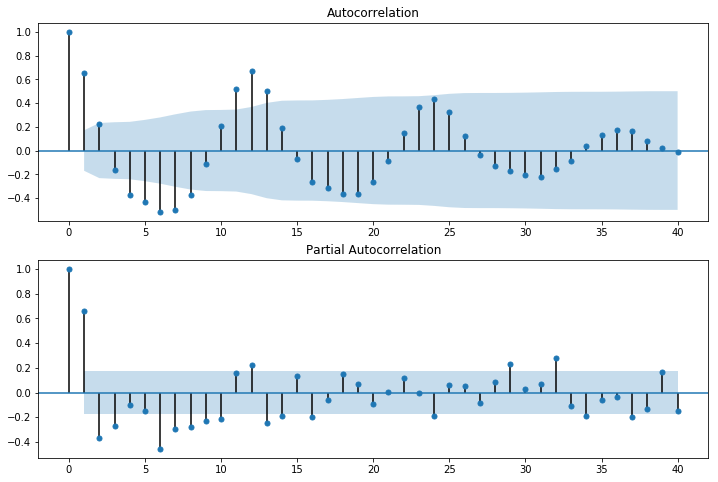

In [335]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residual.iloc[:,1].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residual.iloc[:,1].dropna(), lags=40, ax=ax2)

In [336]:
TestStationaryAdfuller(residual.iloc[:,1].dropna())

Test Statistic                  -5.298428
p-value                          0.000006
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


## Choose differencing

In [430]:
mod = sm.tsa.statespace.SARIMAX(ts.iloc[:130,1].dropna(), 
                                order=(0,1,1), 
                                seasonal_order=(0,1,0,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                                         Statespace Model Results                                                         
Dep. Variable:     International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60   No. Observations:                  130
Model:                                                             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -433.874
Date:                                                                            Sun, 18 Nov 2018   AIC                            871.748
Time:                                                                                    21:27:20   BIC                            877.237
Sample:                                                                                01-01-1949   HQIC                           873.976
                                                                                     - 10-01-1959                                         
Covariance Type:           

C:\Users\karna\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


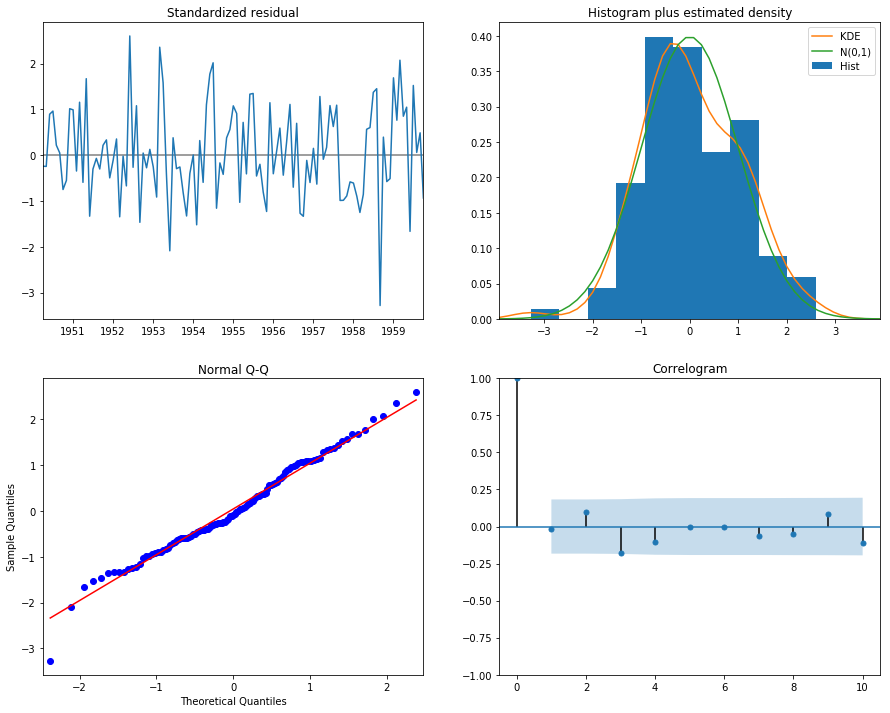

In [431]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [432]:
pred = results.get_prediction(start = 130, end = 143, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,upper International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
1959-11-01,339.602508,380.864677
1959-12-01,361.159803,413.307383
1960-01-01,379.671470,440.795716
1960-02-01,357.762674,426.704512
1960-03-01,418.254057,494.213128


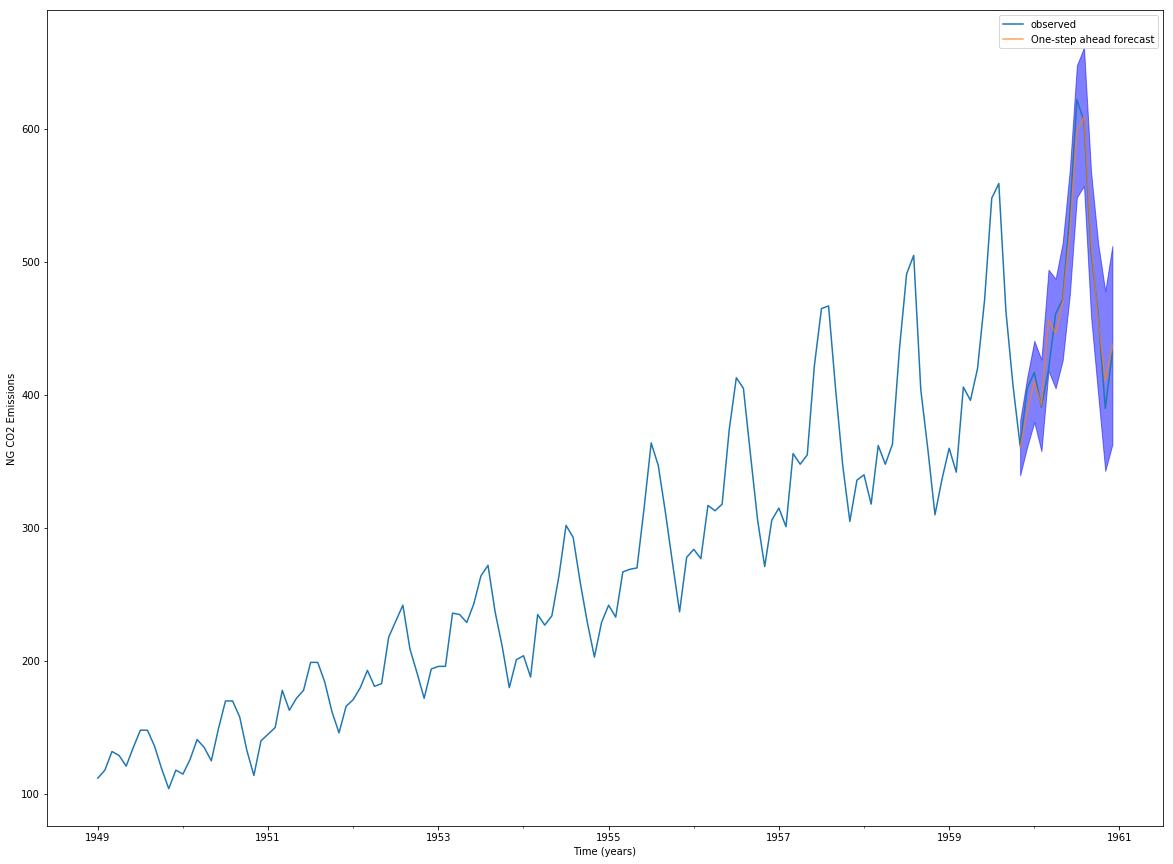

In [433]:
fig,axi = plt.subplots() 
fig.set_size_inches(20,15)
ax = ts.iloc[:,1].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='b', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [435]:
mte_forecast = pred.predicted_mean
mte_truth = ts.iloc[130:,1]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 228.73
The Root Mean Square Error (RMSE) of the forcast: 15.1238


In [438]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 24)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,upper International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
1959-11-01,339.602508,380.864677
1959-12-01,361.159803,413.307383
1960-01-01,379.671470,440.795716
1960-02-01,357.762674,426.704512
1960-03-01,418.254057,494.213128


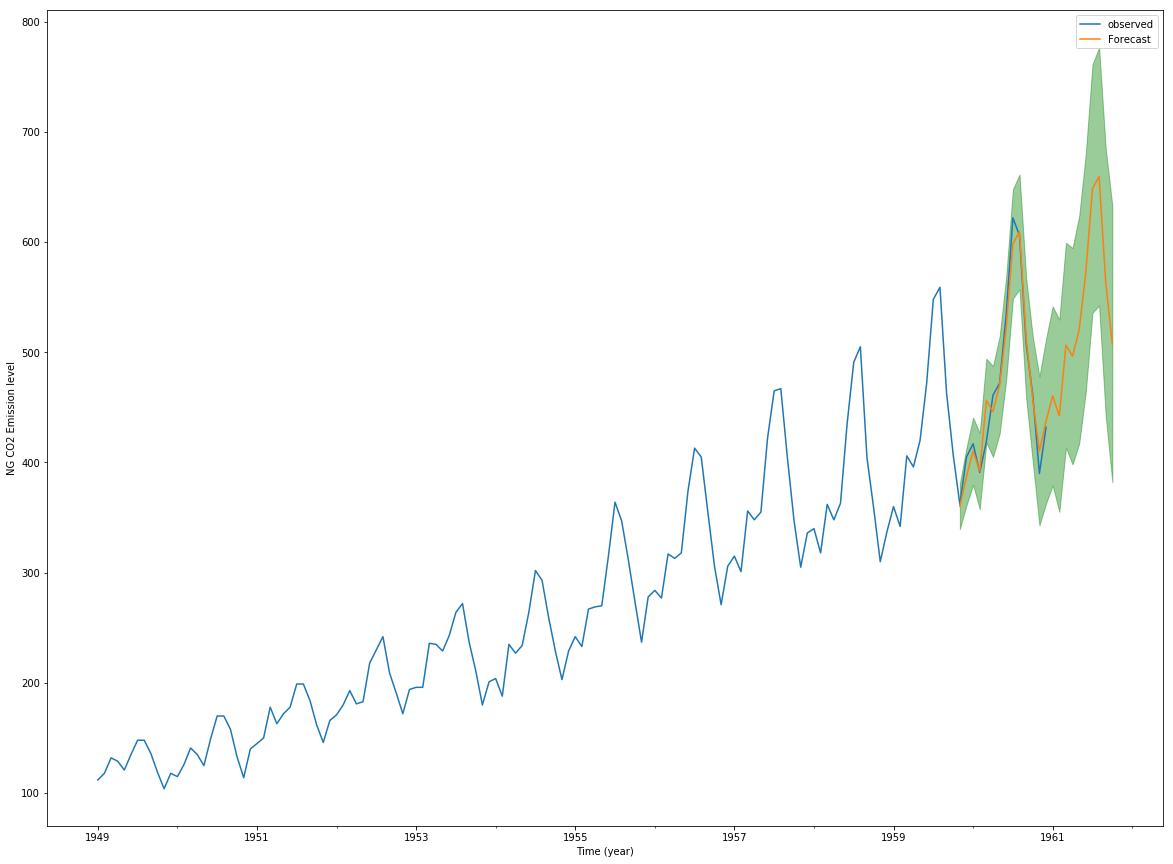

In [439]:
ax = ts.iloc[:,1].plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()